In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider

sns.set_style('darkgrid')

# %matplotlib inline
%matplotlib widget

In [2]:
# Load datasets
gapminder = pd.read_csv('dataset/gapminder_full.csv')

In [3]:
# Preliminary information
print(gapminder.shape)
print(gapminder.info())
print(gapminder.describe())
print(gapminder[['country', 'continent']].describe())

# Missing values?
print(gapminder.isnull().sum(axis=0))

(1704, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None
             year    population     life_exp        gdp_cap
count  1704.00000  1.704000e+03  1704.000000    1704.000000
mean   1979.50000  2.960121e+07    59.474439    7215.327081
std      17.26533  1.061579e+08    12.917107    9857.454543
min    1952.00000  6.001100e+04    23.599000     241.165876
25%    1965.75000  2.793664e+06    48.198000    1202.060309
50%    1979.50000  7.023596e+06    60.712500    3531.846988
75%    1993.25000  1.958522e+07    70.845500    9325.462346
max    2

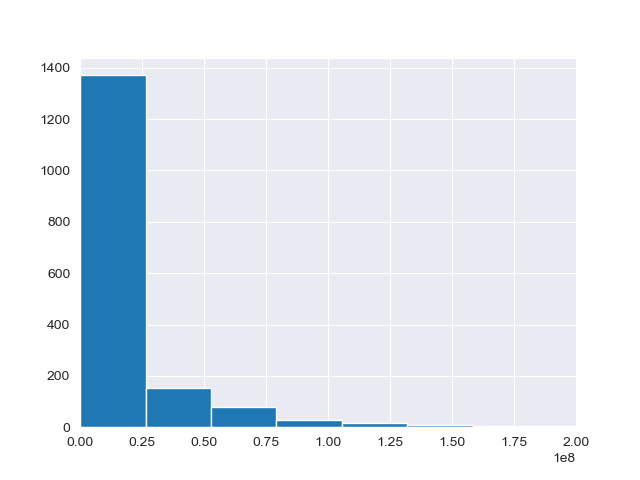

In [4]:
# Plot distribution of population
plt.hist(x=gapminder['population'], bins=50)
plt.xlim(0,0.2e9)
plt.show()

In [5]:
# Set Bin values into discrete intervals
bins = [0, 0.25e8, 0.50e8, 0.75e8, 1e8, 1.25e8, 1.5e8, 1.75e8, 2e8, 6e8, np.max(gapminder['population'])]
sizes = ((3 * np.arange(1, len(bins))) ** 2).tolist()
gapminder['pop_bins'] = pd.cut(x=gapminder['population'], bins=bins,
                               labels=sizes,
                               include_lowest=True)
print(gapminder['pop_bins'].describe())

count     1704
unique      10
top          9
freq      1354
Name: pop_bins, dtype: int64


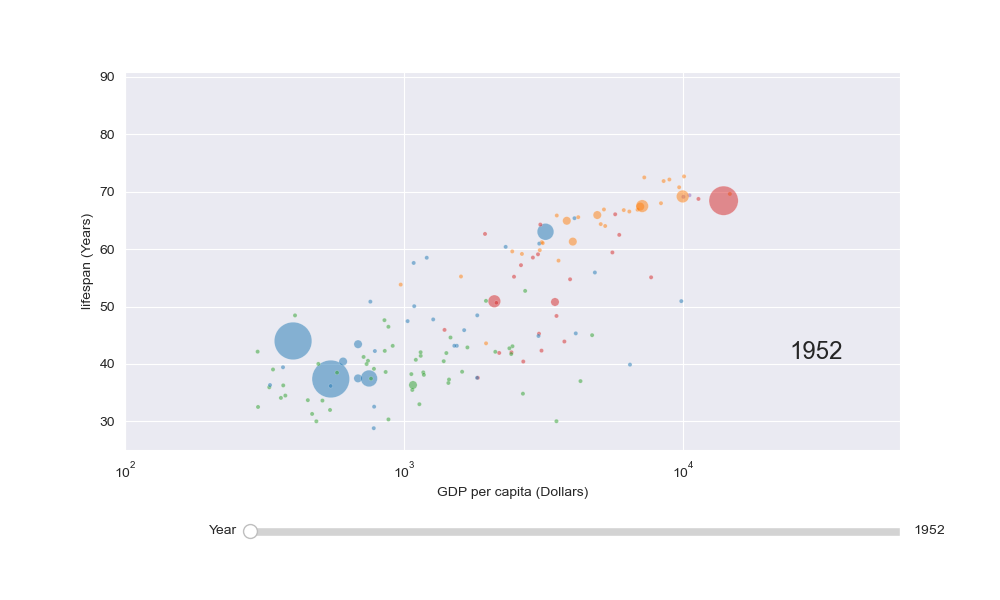

In [6]:
# initialize matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))
# adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(bottom=0.25)
# define an axes area and draw a slider in it
my_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03])
# generate slider with initial value
my_slider = Slider(ax=my_slider_ax, label='Year',
                   valmin=gapminder['year'].min(),
                   valmax=gapminder['year'].max(),
                   valinit=gapminder['year'].min(),
                   valstep=5)

# define an action for when the slider's value changes
def slider_action(val):
    # the figure is updated when the slider is changed
    update_plot(np.round(val))

# link slider_action function to slider object
my_slider.on_changed(slider_action)

# define how to update the plot
def update_plot(year):
    # clear the axis before the plot is redrawn
    ax.clear()
    sns.scatterplot(x='gdp_cap',
                    y='life_exp',
                    data=gapminder[gapminder['year'] == year],
                    hue='continent',
                    size='pop_bins',
                    sizes=sizes,
                    alpha=0.5,
                    legend=False,
                    ax=ax)
    # Labels, Limits
#     ax.set_title('Title')
    ax.set_xlabel('GDP per capita (Dollars)')
    ax.set_ylabel('lifespan (Years)')
#     ax.set_xlim(-10, gapminder['gdp_cap'].max()*1.1)
    ax.set_xlim(100, 6e4)
    ax.set_ylim(25, gapminder['life_exp'].max()*1.1)
    ax.set_xscale('symlog')
#     ax.set_yscale('log')
#     plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
    ax.text(x=3e4, y=42, s=year, fontsize='xx-large',
            ha='center', va='center')
#     ax.text(x=5.5, y=0.5, s=year, fontsize='x-large',
#             ha='center', va='center', transform=ax.transAxes)
#     ax.legend(loc='lower right')



    # # keep the axis limits constant for better visibility of the changes
    # ax.set_ylim(0, np.max(df.my_value.values))
    # update figure
    fig.canvas.draw_idle()
    
# draw initial plot with default intensity
update_plot(gapminder['year'].min())

# display figure
plt.show()